## CNN For Image Classification - TensorFlow

### Load the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0
                                                                                       
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
print(train_images[0].shape)
# Each image is a 32 x 32. 3 means the color channel

(32, 32, 3)


# Plot the first 25 training images

In [ ]:
# Plot the first 25 training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # CIFAR labels are arrays, so index with [0]
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Create the Layer of the Model

In [19]:
# Create model input
inputs = layers.Input(shape=(32, 32, 3))

# First Convolutional Block
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# Second Convolutional Block
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# Third Convolutional Block
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
#last_conv_activations = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = layers.Dropout(0.25)(last_conv_activations)

# Fully Connected Layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)

full_model = models.Model(inputs=inputs, outputs=predictions)

### Display Model Properties

In [20]:
print(full_model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 30, 30,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 30, 30,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 14, 14,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 10, 10,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 10,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 5, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5, 5, 64)  │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 3, 3, 128) │     73,856 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 3, 128) │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 1, 1, 128) │    147,584 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 1, 128) │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 0, 0, 128) │          0 │ batch_normalizat

 Total params: 296,490 (1.13 MB)

 Trainable params: 294,570 (1.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

None


### View Model Properties Graphically

In [ ]:
#pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(full_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Compile the Model

In [21]:
full_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Display the model's architecture

# Fit the Model Through the Dataset

In [ ]:
history = full_model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels),
                    batch_size=64)

# View Model Accuracy and Loss

313/313 - 9s - 28ms/step - accuracy: 0.7144 - loss: 0.8353

Test accuracy: 0.7144


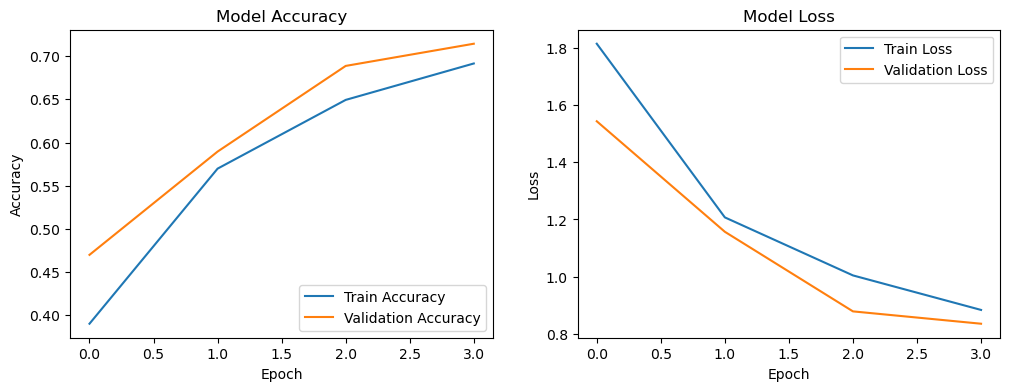

In [7]:
# Evaluate on test data
test_loss, test_acc = full_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Make Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


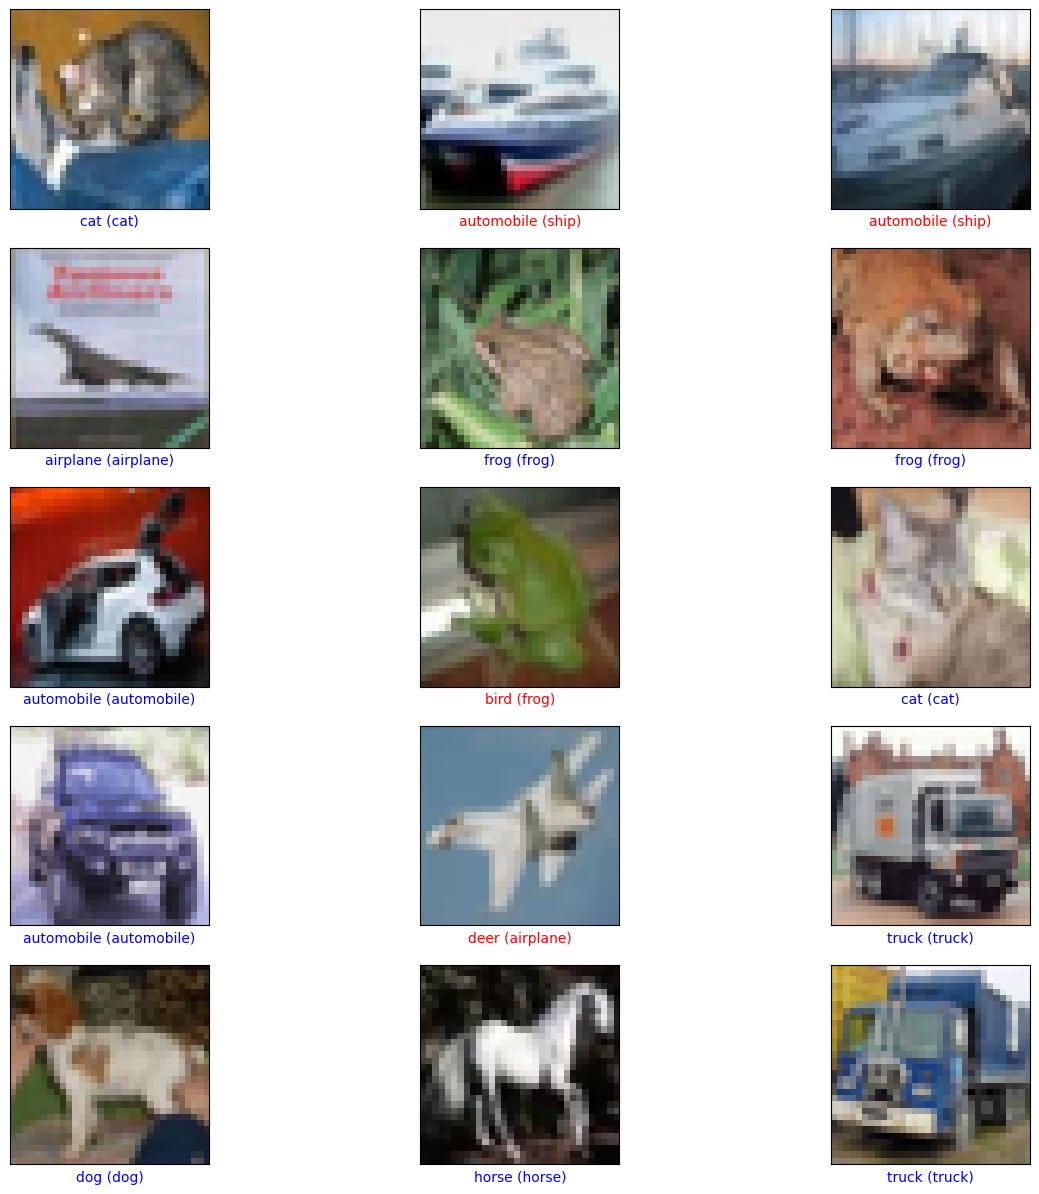

In [8]:
# Predict classes
predictions = full_model.predict(test_images)
pred_classes = np.argmax(predictions, axis=1)

# Function to plot images with predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, pred_label = true_label[i][0], predictions_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[i])
    
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[pred_label]} ({class_names[true_label]})", 
                color=color)

# Plot the first 15 test images, their predicted labels, and the true labels
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plot_image(i, pred_classes, test_labels, test_images)
plt.show()

# Visualize the Feature Map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


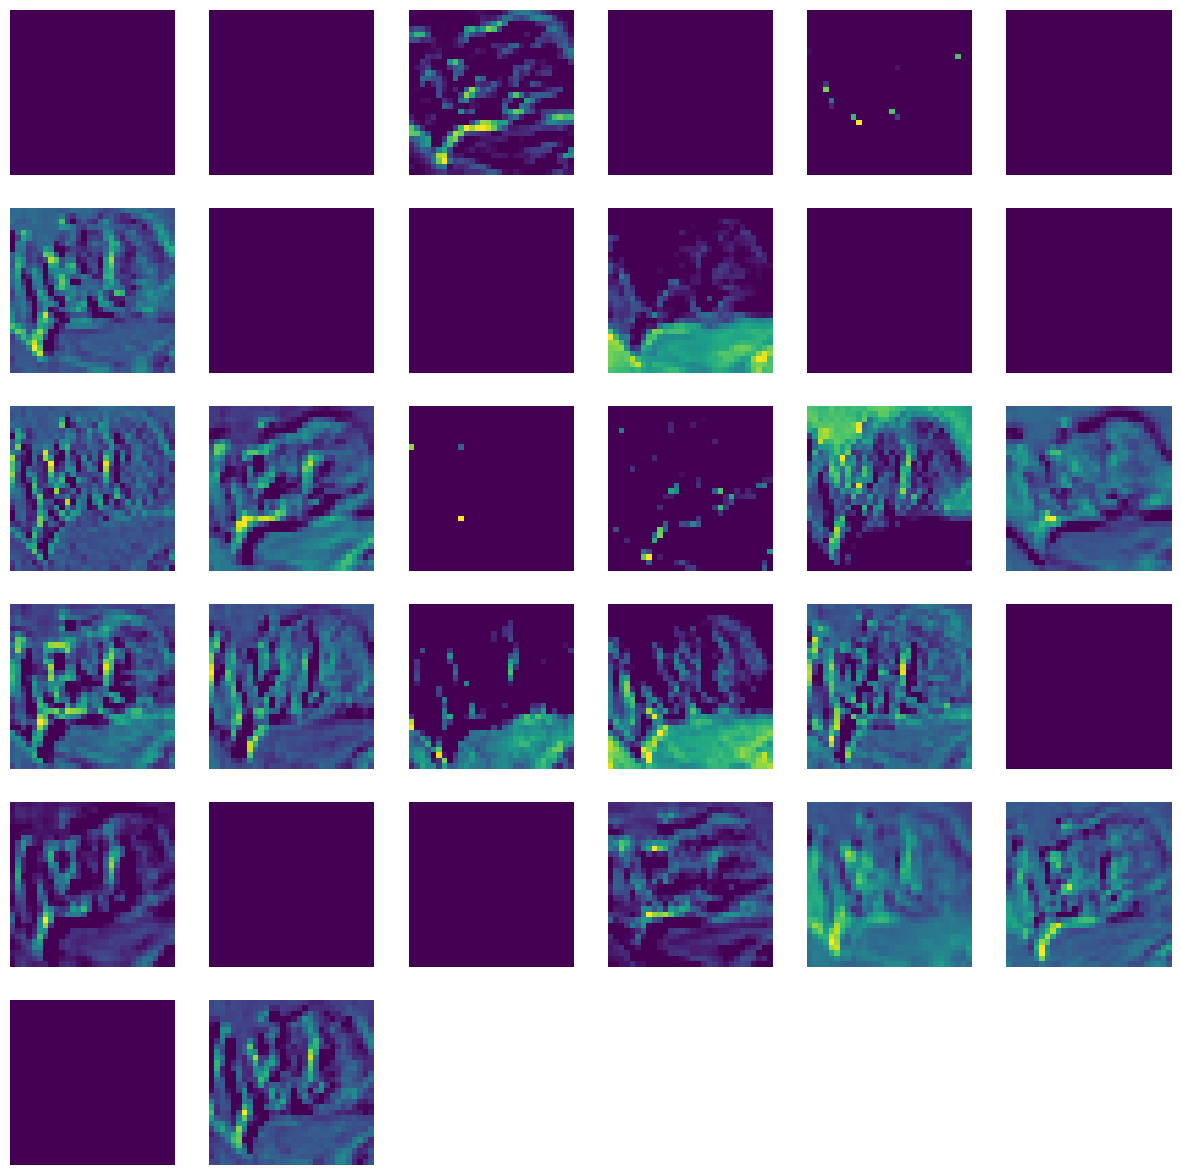

In [10]:
# Create a model that outputs the activations of the first convolutional layer
layer_outputs = [layer.output for layer in full_model.layers if 'conv' in layer.name]

activation_model = models.Model(inputs=full_model.input, outputs=layer_outputs)

# Get activations for a sample image
sample_image = test_images[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(sample_image)

# Plot the feature maps
first_layer_activation = activations[0]
plt.figure(figsize=(15, 15))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

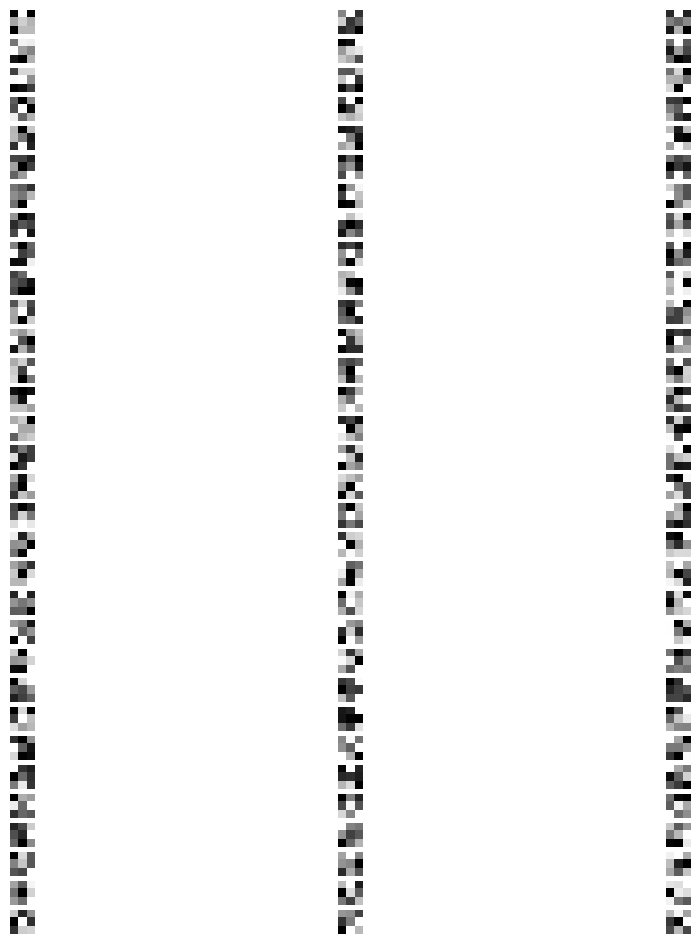

In [11]:
# Get the weights of the first convolutional layer
first_conv_layer = full_model.layers[1]
filters, biases = first_conv_layer.get_weights()

# Normalize filter values to 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 32 filters
plt.figure(figsize=(12, 12))
for i in range(32):
    f = filters[:, :, :, i]
    # Plot each channel separately
    for j in range(3):
        plt.subplot(32, 3, i*3 + j + 1)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.axis('off')
plt.show()

In [17]:
inputs.shape

(None, 32, 32, 3)

In [28]:
train_images.shape

(50000, 32, 32, 3)

In [31]:
import tensorflow as tf
import numpy as np

# --- Step 1: Identify the Last Convolutional Layer ---
# Option A: If you know the name of the last conv layer (e.g., 'conv2d_3')
# last_conv_layer = model.get_layer('conv2d_3')

# Option B: Iterate in reverse to find the last Conv2D layer.
last_conv_layer = None
for layer in reversed(full_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer
        break

if last_conv_layer is None:
    raise ValueError("No Conv2D layer found in the model.")

print("Last convolutional layer:", last_conv_layer.name)
print("Output shape of last conv layer:", last_conv_layer.output.shape)

# --- Step 2: Create a New Model with Multiple Outputs ---
# The new model takes the same input and outputs both the activations from
# the last convolutional layer and the final predictions.
combined_model = tf.keras.Model(
    inputs=full_model.input,
    outputs=[last_conv_layer.output, full_model.output]
)

# --- Testing the Combined Model ---
# Create a sample input (for instance, a random image with shape (1, 32, 32, 3))
sample_input = np.random.rand(1, 32, 32, 3).astype('float32')

# Get both outputs from the new model
conv_activations, final_predictions = combined_model.predict(sample_input)

print("Shape of activations from the last conv layer:", conv_activations.shape)
print("Shape of final predictions:", final_predictions.shape)


Last convolutional layer: conv2d_5
Output shape of last conv layer: (None, 1, 1, 128)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Shape of activations from the last conv layer: (1, 1, 1, 128)
Shape of final predictions: (1, 10)


In [33]:
# Compute the gradient of the top predicted class for the input image
with tf.GradientTape() as tape:
    conv_outputs, predictions = combined_model(sample_image)
    top_pred_index = np.argmax(predictions[0])
    top_class_channel = predictions[:, top_pred_index]

# Compute the gradient of the top class wrt the last conv layer
grads = tape.gradient(top_class_channel, conv_outputs)

# Pool the gradients over all the axes except for the channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# Multiply each channel in the array by the corresponding gradient
heatmap = conv_outputs[0] @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Apply ReLU to the heatmap
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

heatmap = heatmap.numpy() # Convert heatmap to numpy

In [35]:
heatmap

1.0